In [11]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import sklearn.model_selection as Ms
import warnings 
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:

df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [4]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [5]:
df = df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[["Relative_Compactness", 'Cooling_Load']].sample(15, random_state=2)


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

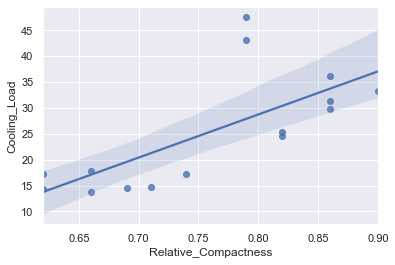

In [6]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df)

<AxesSubplot:>

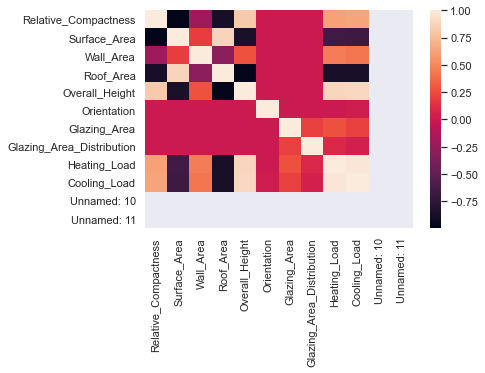

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,NaN,NaN
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999,NaN,NaN
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117,NaN,NaN
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547,NaN,NaN
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785,NaN,NaN
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,NaN,NaN
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505,NaN,NaN
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,NaN,NaN
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862,NaN,NaN
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,NaN,NaN


In [9]:
#take care of info and NaN
df.dropna(axis=1,inplace=True)
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [12]:
import sklearn.preprocessing as pp
pp?

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [74]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
scaler=MinMaxScaler()
normalised_df=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

feature_df = normalised_df.drop(columns=['Heating_Load','Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#feature_df = np.array(normalised_df.Heating_Load).reshape(-1, 1)
#heating_target = normalised_df['Cooling_Load']

In [75]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features
# and target variables.
x_train, x_test, y_train, y_test = train_test_split(feature_df, heating_target, test_size = 0.3, random_state=1)

linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train,y_train)


#obtain predictions
predicted_values = linear_model.predict(x_test)

In [76]:
from sklearn.metrics import mean_absolute_error

In [77]:
#MAE
mae = mean_absolute_error(y_test,predicted_values)
round(mae,3)

0.063

In [78]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss,3)

1.823

Root Mean Square Error (RMSE)

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse,3)

0.089

In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_score = r2_score(y_test,predicted_values)
round(r2_score,3)

0.893

Lesson 3

Penalization Methods

Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

Feature Selection and Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001)

In [51]:
#comparing the effects of regularisation
def get_weights_df(model,feat,col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_,feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [54]:
linear_model_weights = get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train,'Ridge_Weight')
lasso_weights_df=get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

In [62]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [63]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Surface_Area,-3.458933e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,5.081177e-03,0.003369,0.000000
3,Glazing_Area_Distribution,3.077054e-02,0.029088,0.021431
4,Glazing_Area,2.125349e-01,0.212449,0.206132
5,Overall_Height,3.967285e-01,0.442467,0.463482
6,Wall_Area,2.017711e+12,0.103061,0.200087
7,Roof_Area,2.594200e+12,-0.163192,-0.000000
